In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os

In [2]:
import sklearn

## Plan  
- Divide each image into 25 equal chunks
- Compute the average of R, G and B for each chunk
- This gives 75 variables
- Fit some sort of model to these (nearest neighbours?)

In [3]:
#Read an example image and convert to RGB for matplotlib
img=cv2.imread("data/ad.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
codes=pd.read_csv("data/wikipedia-iso-country-codes.csv").to_dict(orient='dict')
codes['Alpha-2 code'][0]
codes?


In [5]:
codes=pd.read_csv("data/wikipedia-iso-country-codes.csv")
codes.set_index("Alpha-2 code", drop=True, inplace=True)
codes=codes.to_dict(orient='index')


In [6]:
#Check dimensions
img.shape

(385, 550, 3)

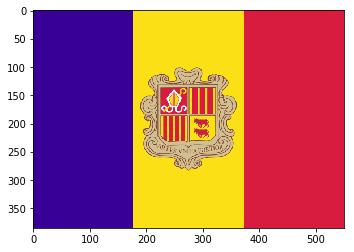

In [7]:
#Show the image
plt.imshow(img)

(<matplotlib.axes._subplots.AxesSubplot at 0x13f0cf70860>,
 <matplotlib.image.AxesImage at 0x13f0cfc95f8>)

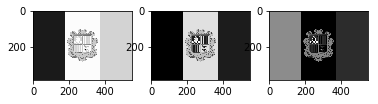

In [8]:
#Visualise the three different layers
plt.subplot(131),plt.imshow(img[:,:,0],cmap='gray')
plt.subplot(132),plt.imshow(img[:,:,1],cmap='gray')
plt.subplot(133),plt.imshow(img[:,:,2],cmap='gray')

In [9]:
dim = (5, 5)
img_small = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)

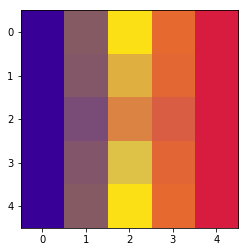

In [10]:
plt.imshow(img_small)

In [11]:
print(img_small)

[[[ 56   0 150]
  [134  90  99]
  [252 224  22]
  [230 106  47]
  [216  28  63]]

 [[ 56   0 150]
  [131  86 104]
  [223 175  64]
  [227 103  51]
  [216  28  63]]

 [[ 56   0 150]
  [121  76 119]
  [219 131  67]
  [217  93  67]
  [216  28  63]]

 [[ 56   0 150]
  [130  85 106]
  [222 194  71]
  [226 102  53]
  [216  28  63]]

 [[ 56   0 150]
  [134  90  99]
  [252 224  22]
  [230 106  47]
  [216  28  63]]]


In [20]:
#This is my training vector
x=img_small.flatten()
x

array([ 56,   0, 150, 134,  90,  99, 252, 224,  22, 230, 106,  47, 216,
        28,  63,  56,   0, 150, 131,  86, 104, 223, 175,  64, 227, 103,
        51, 216,  28,  63,  56,   0, 150, 121,  76, 119, 219, 131,  67,
       217,  93,  67, 216,  28,  63,  56,   0, 150, 130,  85, 106, 222,
       194,  71, 226, 102,  53, 216,  28,  63,  56,   0, 150, 134,  90,
        99, 252, 224,  22, 230, 106,  47, 216,  28,  63], dtype=uint8)

In [21]:
x=pd.Series(['a','b'])
y=pd.Series([1],index=[3])
x.append(y)

0    a
1    b
3    1
dtype: object

In [43]:
import os
directory = 'data/train'
out=pd.DataFrame()
i=0
for filename in os.listdir(directory):
    if filename.endswith(".png"):
        img=cv2.imread(directory + '/' + filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        dim = (5, 5)
        img_small = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
        #x=img_small.flatten()
        x=pd.Series(filename[0:2].upper())
        y=pd.Series(img_small.flatten())
        v=x.append(y,ignore_index=True)
        out=out.append(v,ignore_index=True)
    else:
        continue

b=['v'+str(x) for x in range(1,76)]
b.insert(0,'cn')
out.columns=b


In [38]:
out


,cn,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75
0,AD,56.0,0.0,150.0,134.0,90.0,99.0,252.0,224.0,22.0,...,99.0,252.0,224.0,22.0,230.0,106.0,47.0,216.0,28.0,63.0
1,AE,206.0,17.0,38.0,51.0,120.0,9.0,0.0,154.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AF,0.0,0.0,0.0,64.0,0.0,0.0,191.0,0.0,0.0,...,0.0,191.0,0.0,0.0,63.0,102.0,0.0,0.0,153.0,0.0
3,AG,52.0,4.0,10.0,3.0,2.0,0.0,39.0,32.0,3.0,...,38.0,231.0,136.0,147.0,206.0,17.0,38.0,206.0,17.0,38.0
4,AL,206.0,17.0,38.0,206.0,17.0,38.0,204.0,17.0,38.0,...,38.0,206.0,17.0,38.0,206.0,17.0,38.0,206.0,17.0,38.0
5,AM,255.0,0.0,0.0,255.0,0.0,0.0,255.0,0.0,0.0,...,0.0,255.0,153.0,0.0,255.0,153.0,0.0,255.0,153.0,0.0
6,AO,206.0,17.0,38.0,206.0,17.0,38.0,206.0,17.0,38.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
7,AR,117.0,170.0,219.0,117.0,170.0,219.0,117.0,170.0,219.0,...,219.0,117.0,170.0,219.0,117.0,170.0,219.0,117.0,170.0,219.0
8,AT,216.0,30.0,5.0,216.0,30.0,5.0,216.0,30.0,5.0,...,5.0,216.0,30.0,5.0,216.0,30.0,5.0,216.0,30.0,5.0
9,AU,150.0,115.0,172.0,179.0,95.0,136.0,83.0,63.0,157.0,...,147.0,0.0,0.0,139.0,20.0,20.0,148.0,0.0,0.0,139.0


In [47]:
#out2=out.merge(codes,left_on='cn',right_on='Alpha-2 code')
#out2.drop(['cn','Alpha-2 code'],axis=1)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v67,v68,v69,v70,v71,v72,v73,v74,v75,Country
0,56.0,0.0,150.0,134.0,90.0,99.0,252.0,224.0,22.0,230.0,...,252.0,224.0,22.0,230.0,106.0,47.0,216.0,28.0,63.0,Andorra
1,206.0,17.0,38.0,51.0,120.0,9.0,0.0,154.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United Arab Emirates
2,0.0,0.0,0.0,64.0,0.0,0.0,191.0,0.0,0.0,63.0,...,191.0,0.0,0.0,63.0,102.0,0.0,0.0,153.0,0.0,Afghanistan
3,52.0,4.0,10.0,3.0,2.0,0.0,39.0,32.0,3.0,3.0,...,231.0,136.0,147.0,206.0,17.0,38.0,206.0,17.0,38.0,Antigua and Barbuda
4,206.0,17.0,38.0,206.0,17.0,38.0,204.0,17.0,38.0,206.0,...,206.0,17.0,38.0,206.0,17.0,38.0,206.0,17.0,38.0,Albania
5,255.0,0.0,0.0,255.0,0.0,0.0,255.0,0.0,0.0,255.0,...,255.0,153.0,0.0,255.0,153.0,0.0,255.0,153.0,0.0,Armenia
6,206.0,17.0,38.0,206.0,17.0,38.0,206.0,17.0,38.0,206.0,...,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,Angola
7,117.0,170.0,219.0,117.0,170.0,219.0,117.0,170.0,219.0,117.0,...,117.0,170.0,219.0,117.0,170.0,219.0,117.0,170.0,219.0,Argentina
8,216.0,30.0,5.0,216.0,30.0,5.0,216.0,30.0,5.0,216.0,...,216.0,30.0,5.0,216.0,30.0,5.0,216.0,30.0,5.0,Austria
9,150.0,115.0,172.0,179.0,95.0,136.0,83.0,63.0,157.0,19.0,...,0.0,0.0,139.0,20.0,20.0,148.0,0.0,0.0,139.0,Australia


In [54]:
y=out['cn']
x=out.loc[:,out.columns !='cn']

In [55]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(x,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [94]:
from sklearn.externals import joblib
joblib.dump(knn, 'knn.pkl') 

C:\Users\RN\Miniconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['knn.pkl']

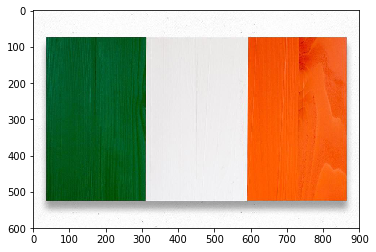

In [12]:
#Now try to test
testimg=cv2.imread("data/test/13.jpg")
testimg = cv2.cvtColor(testimg, cv2.COLOR_BGR2RGB)
plt.imshow(testimg)

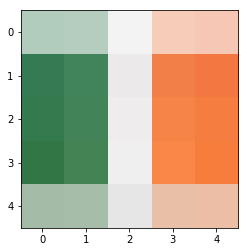

In [13]:
dim = (5, 5)
testimg_small = cv2.resize(testimg,dim,interpolation = cv2.INTER_AREA)
testvec=testimg_small.flatten()
plt.imshow(testimg_small)

In [166]:
testvec
result=knn.predict(testvec.reshape(1,-1))

In [167]:
print('Flag of ' + codes[result[0]]['Country'])

Flag of Ireland


In [101]:
out.to_csv('out.csv')

'Australia'

{'Alpha-2 code': 'AF', 'Country': 'Afghanistan'}
